# Manufacturing Defects

### 1) Problem Statement
- This project aims to predict high or low defect occurrences in the production process and how it is affected by variables such as Production Volume, Production Cost, Supplier Quantity, Delivery Delay, Defect Rate, Quality Score, Maintenance Hours, Downtime Percentage, Inventory Turnover, Stockout Rate, Worker Productivity, Safety Incidents, Energy Consumption, Energy Efficiency, Additive Process Time, and Additive Material Cost.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/rabieelkharoua/predicting-manufacturing-defects-dataset?resource=download

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/manufacturing_defect_dataset.csv')

#### Show Top 5 Records

In [3]:
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


#### Shape of the dataset

In [4]:
df.shape

(3240, 17)

### 2.2 Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

#### All columns are numerical. One Hot Encoder is not required.

### 3) Data Exploration

### 3.1 Check Missing Values

In [7]:
df.isna().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

#### There are no duplicate values in the data set

### 3.3 Check Unique Values of each column

In [9]:
df.nunique()

ProductionVolume         862
ProductionCost          3240
SupplierQuality         3240
DeliveryDelay              6
DefectRate              3240
QualityScore            3240
MaintenanceHours          24
DowntimePercentage      3240
InventoryTurnover       3240
StockoutRate            3240
WorkerProductivity      3240
SafetyIncidents           10
EnergyConsumption       3240
EnergyEfficiency        3240
AdditiveProcessTime     3240
AdditiveMaterialCost    3240
DefectStatus               2
dtype: int64

### 3.4 Check Statistics of the Data Set

In [10]:
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


### 3.5 Check Balance of the Data Set

<Axes: xlabel='DefectStatus', ylabel='count'>

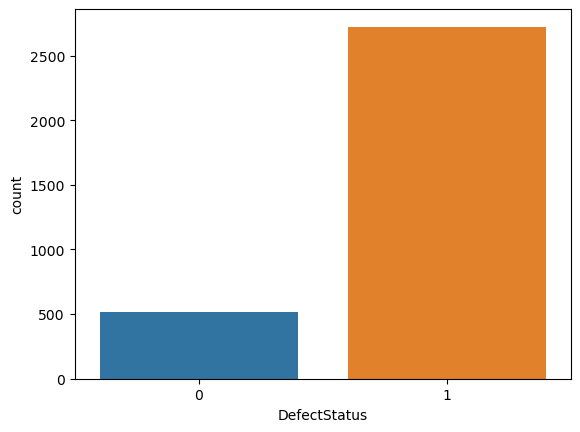

In [14]:
sns.countplot(data=df,x='DefectStatus')

#### Data set is imbalanced and may require under sampling for better model performance

### 3.6 Check Feature Correlations

<Axes: >

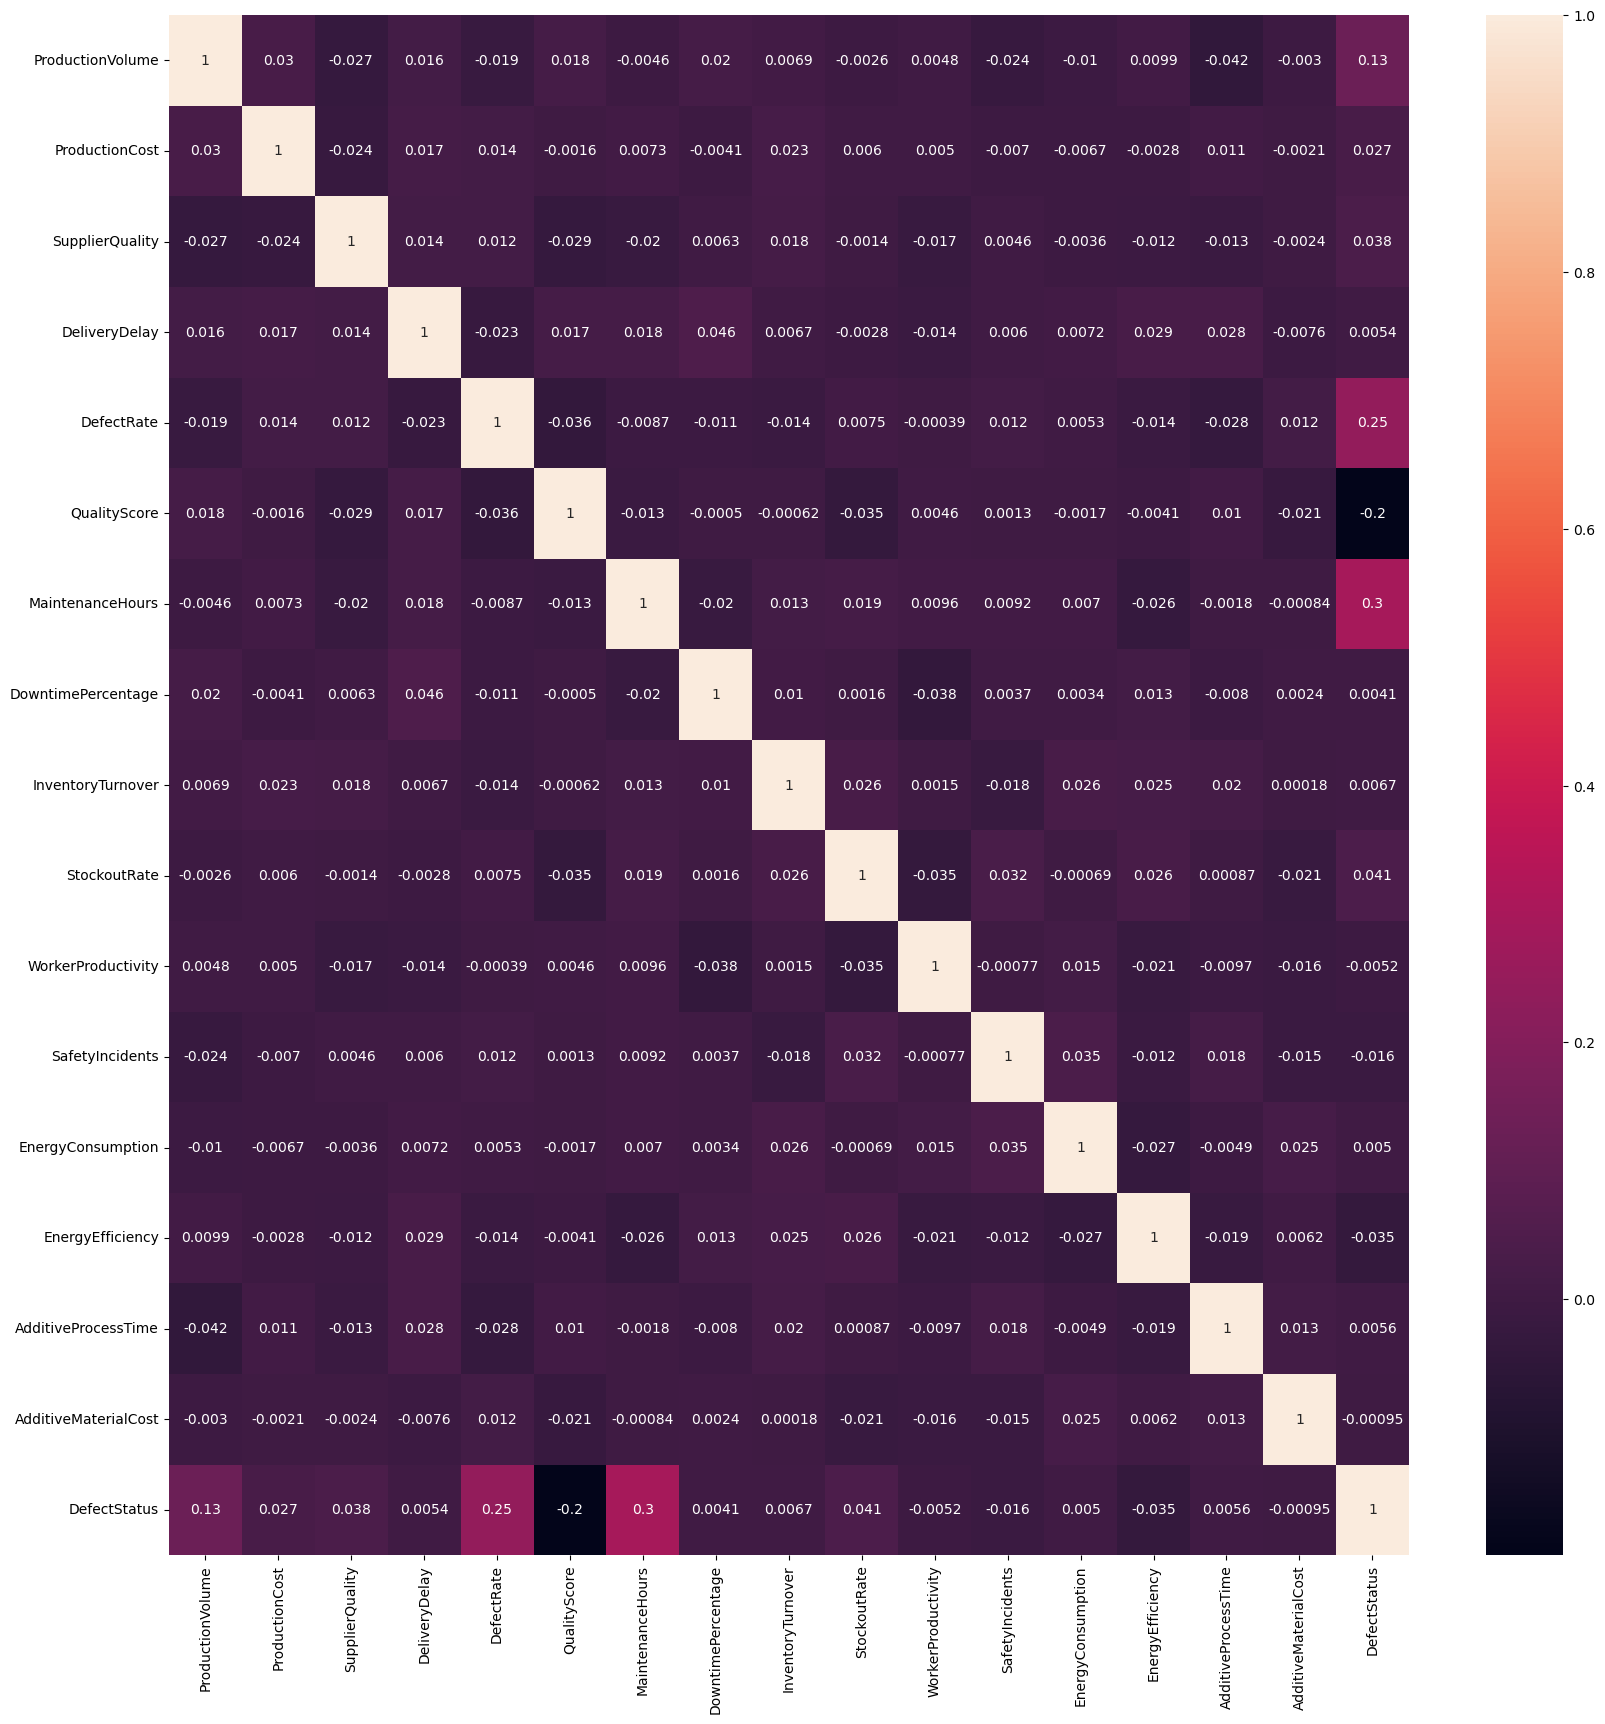

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)


#### Maintenance Hours, Quality Score, Defect Rate, and Production Volume are strongly correlated with Defect Status

<Figure size 2000x2000 with 0 Axes>

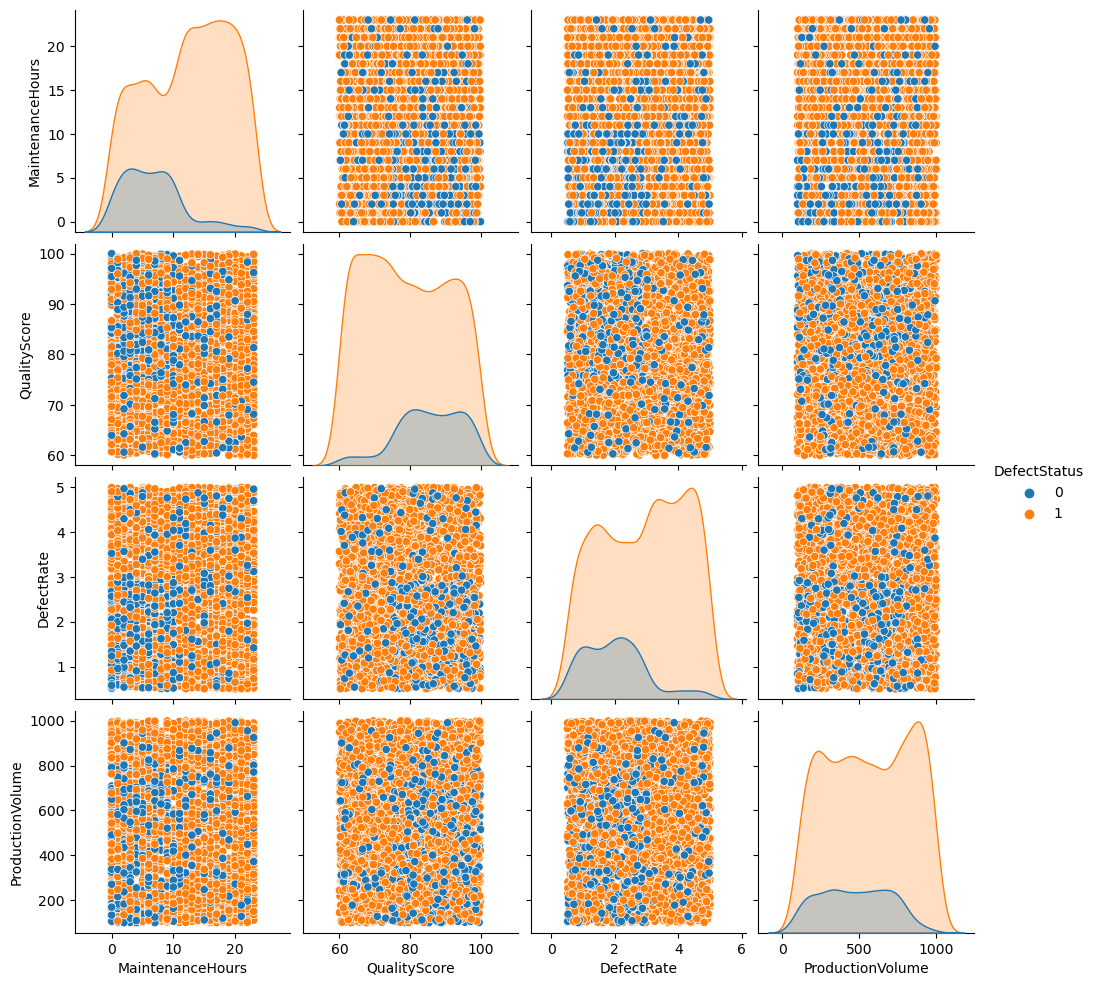

In [30]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['MaintenanceHours','DefectStatus','QualityScore','DefectRate','ProductionVolume']], hue='DefectStatus')